In [1]:
!pip3 install torchgan

     |████████████████████████████████| 61kB 5.3MB/s 


In [0]:
import torchvision
import torchgan
from torch.optim import Adam
import torch.utils.data as data
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torchgan.models import DCGANGenerator, DCGANDiscriminator
from torchgan.losses import MinimaxGeneratorLoss, MinimaxDiscriminatorLoss
from torchgan.trainer import Trainer
from google.colab.patches import cv2_imshow
import cv2
import os
import numpy as np
import torch

In [179]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def mnist_dataloader():
    train_dataset = dsets.MNIST(root="./mnist", train=True, download=True,
                      transform=transforms.Compose([transforms.Resize((28, 28)),
                                                    transforms.ToTensor(),
                                                    transforms.Normalize(mean=(0.5,),
                                                                         std=(0.5,))]))
    train_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)
    return train_loader


In [0]:
def apple_loader(size=512):
  for root, dirs, files in os.walk("../content/drive/My Drive/apples/images/"):
      res = np.zeros((size, 3,32,32))

      for i, file in enumerate(files):
        
        j = i
        if file.endswith(".jpg"):
             image=cv2.imread(root+file)
             try:
                image.resize(3,32,32)
                image = image/ 127.5 - 1.
            
             except AttributeError:
                pass
             res[i,:,:,:] = image
        if j > size-2 : 
          j = 0
          features = torch.from_numpy(res)
          features = features.float()
          targets = torch.ones(size)
          train_tensor = data.TensorDataset(features, targets)
          train_loader = data.DataLoader(train_tensor, batch_size=128, shuffle=True)
          return train_loader

In [195]:
trainer = Trainer({"generator": {"name": DCGANGenerator, "args": {"out_channels": 3, "step_channels": 16}, "optimizer": {"name": Adam, "args": {"lr": 0.0002, "betas": (0.5, 0.999)}}},
                   "discriminator": {"name": DCGANDiscriminator, "args": {"in_channels": 3, "step_channels": 16}, "optimizer": {"name": Adam, "args": {"lr": 0.0002, "betas": (0.5, 0.999)}}}},
                  [MinimaxGeneratorLoss(), MinimaxDiscriminatorLoss()],
                  sample_size=32, epochs=20)

trainer(apple_loader(1024))


Saving Model at './model/gan0.model'
Epoch 1 Summary
generator Mean Gradients : 1.1680657976281106
discriminator Mean Gradients : 6.1176405198251205
Mean Running Discriminator Loss : nan
Mean Running Generator Loss : nan
Generating and Saving Images to ./images/epoch1_generator.png

Saving Model at './model/gan1.model'
Epoch 2 Summary
generator Mean Gradients : 0.618387775214882
discriminator Mean Gradients : 3.2387508634368287
Mean Running Discriminator Loss : nan
Mean Running Generator Loss : nan
Generating and Saving Images to ./images/epoch2_generator.png

Saving Model at './model/gan2.model'
Epoch 3 Summary
generator Mean Gradients : 0.4205036871461198
discriminator Mean Gradients : 2.2023505871370435
Mean Running Discriminator Loss : nan
Mean Running Generator Loss : nan
Generating and Saving Images to ./images/epoch3_generator.png

Saving Model at './model/gan3.model'
Epoch 4 Summary
generator Mean Gradients : 0.31856339935312106
discriminator Mean Gradients : 1.6684474144977601

In [82]:
sample = cv2.imread('images/epoch13_generator.png')
sample.shape

(138, 274, 3)

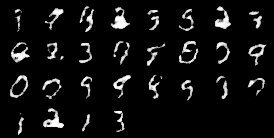

In [83]:
cv2_imshow(sample)

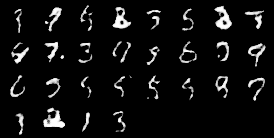

In [81]:
cv2_imshow(sample)


In [0]:
import torch

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
